![](itd.png)

    
# Análisis de Datos Masivos
## Regresión lineal de datos del tráfico de Internet

## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

### Parte 1: Importar las bibliotecas

En esta parte instalará e importará todas las bibliotecas necesarias para completar esta práctica de laboratorio.
#### Paso 1: Instalar la biblioteca de scikit-learn.

Se debe de realizar la instalación del módulo correspondiente, en dado caso de que no este instalado.

#### Paso 2: Importar el resto de las bibliotecas.

    pandas
    numpy
    pyplot (y utilice el estilo fivethirtyeight u otro si lo prefiere)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit


### Parte 2: Visualizar los datos históricos
#### Paso 1: Cargar datos históricos sobre el tráfico d Internet.

Cargue el conjunto de datos internet_traffic_hist.csv a un DataFrame de pandas, y visualice las primeras filas.


In [3]:
filename = 'internet_traffic_hist.csv'
df_hist = pd.read_csv(filename)
df_hist.head()


,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


#### Paso 2: Visualizar el volumen de tráfico de Internet.

De acuerdo con Cisco VNI Forecast, el tráfico de Internet fijo de los consumidores crecerá un 22 % por año desde 2015 hasta 2020. En esta práctica de laboratorio se asumirá que el índice de crecimiento fue el mismo entre 2005 y 2015. Siguiendo esta suposición, el valor del tráfico de Internet correspondiente al año 2005 se fija en 100. El DataFrame df_hist contiene la evolución del volumen de tráfico de Internet fijo hasta 2015 (más o menos una determinada variación interanual).

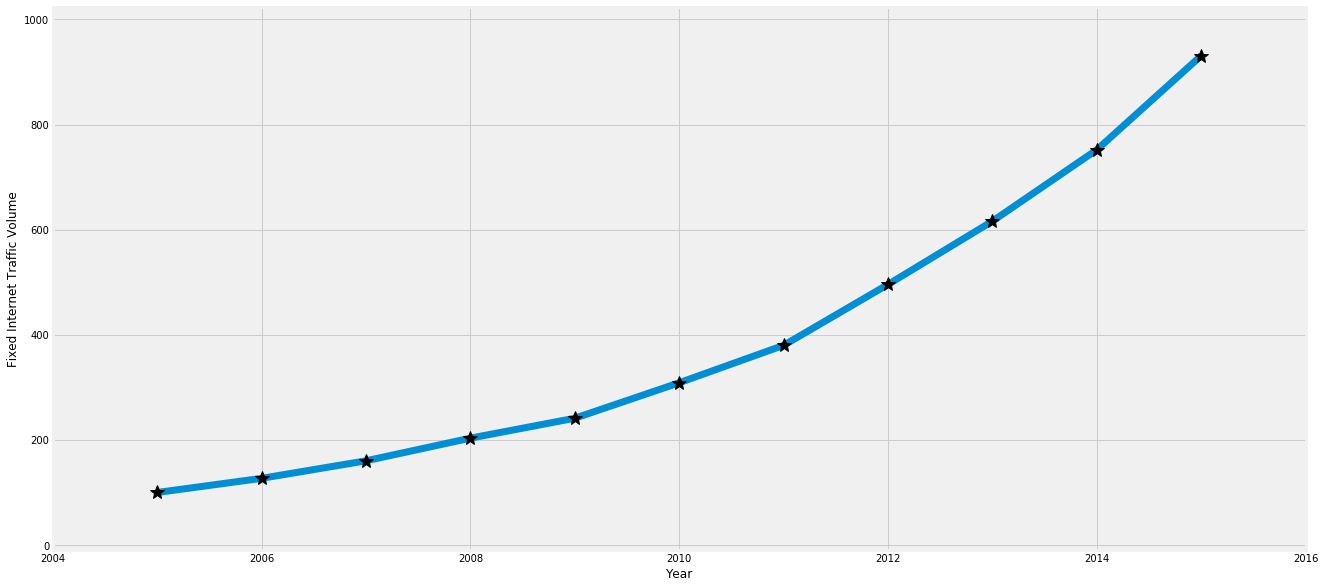

In [4]:
# Crea una figura un poco más grande usa todo el espacio disponible
plt.figure(figsize = (20,10))
# XY Gráfico del año y tráfico
x = df_hist.year
y = df_hist.traffic
# XY Gráfico del año y tráfico
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')
# Aumente ligeramente los tamaños de los ejes para que la gráfica sea más clara
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])
# Agregar etiquetas de eje
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
# Aumentar el tamaño de fuente predeterminado
plt.rcParams.update({'font.size': 26})
plt.show()

### Parte 3: Regresión lineal simple - Polinomio de primer orden

Para un analista de datos, una tarea de regresión se puede considerar un proceso de decisión de dos etapas:

    Como primer paso, elija el modelo de regresión (o la familia de modelos) que se utilizará para registrar la relación matemática entre las variables observadas.

    En segundo lugar, adapte el modelo determinado a los datos; es decir, elija una métrica para evaluar la calidad de aptitud de un modelo y calcule los valores de los parámetros que maximicen dicha métrica.

La elección de la familia de modelos que se adaptará es el primer paso fundamental en la regresión.

#### Paso 1: Superponer un modelo de regresión lineal simple con los datos históricos de Internet.

En Python, la función polyfit se utiliza desde la biblioteca numpy para adaptar un modelo de regresión polinómico de cualquier orden y encontrar los parámetros que minimicen el ECM.

La pendiente de la línea es 79.5271096624497.
La intersección y es-159457.1226583487.
La línea de regresión lineal simple que mejor se ajusta es 79.5271096624497x + -159457.1226583487.


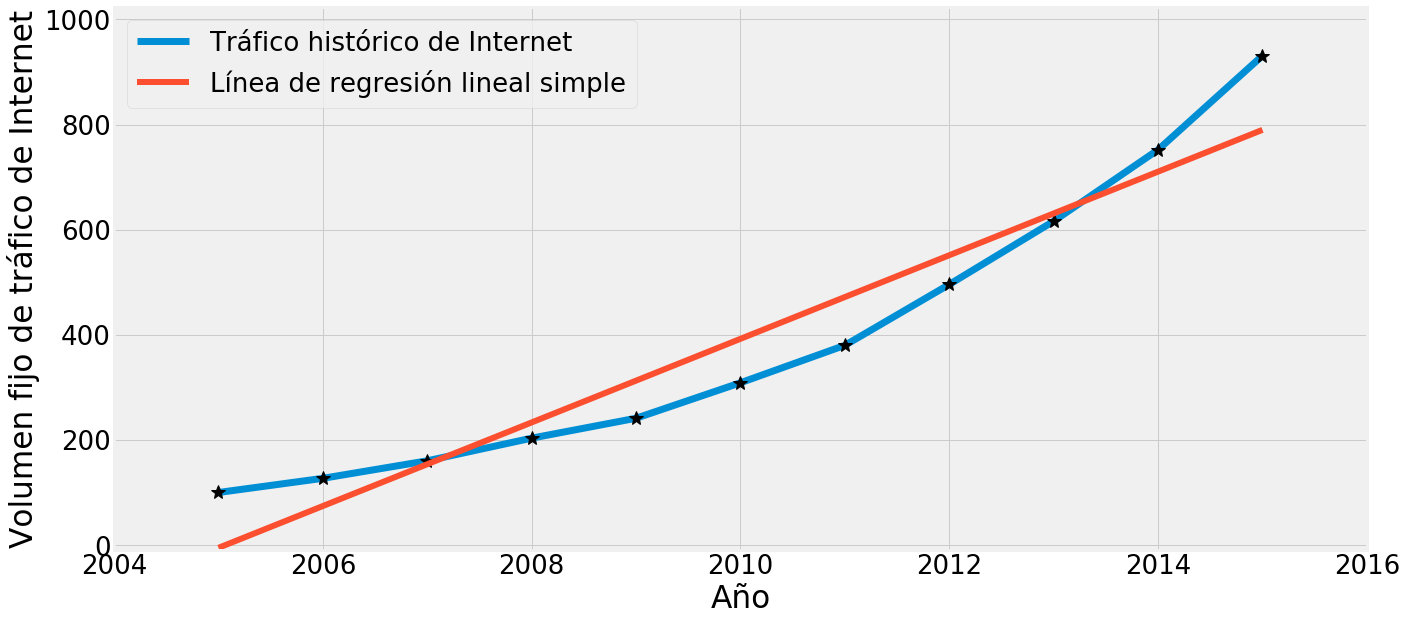

In [5]:
# Crea una figura un poco más grande usa todo el espacio disponible
plt.figure(figsize = (20,10))
order = 1
# XY Gráfico del año y tráfico
x = df_hist.year
y = df_hist.traffic
m, b = np.polyfit(x,y,order)
plt.plot(x, y, label = 'Tráfico histórico de Internet', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Línea de regresión lineal simple', linewidth = 6)
print ('La pendiente de la línea es {}.'.format(m))
print ('La intersección y es{}.'.format(b))
print ('La línea de regresión lineal simple que mejor se ajusta es {}x + {}.'.format(m,b))
# Aumente ligeramente los tamaños de los ejes para que la gráfica sea más clara
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])
# Agregar etiquetas de eje
plt.xlabel('Año')
plt.ylabel('Volumen fijo de tráfico de Internet')
plt.legend(loc = 'upper left')
# Aumentar el tamaño de fuente predeterminado
plt.rcParams.update({'font.size': 26})
plt.show()

### Parte 4: Regresión lineal simple - Polinomios de orden superior

El trazado de regresión lineal simple indica que el modelo de regresión lineal simple no es adecuado para proyectar el tráfico de Internet en el año 2020.

Adaptará un modelo de regresión polinómico de segundo orden y otro de tercer orden a los datos históricos de tráfico de Internet y guardará los errores y el ECM correspondiente a cada modelo en una lista. Se los usará para comparar modelos de regresión más adelante.

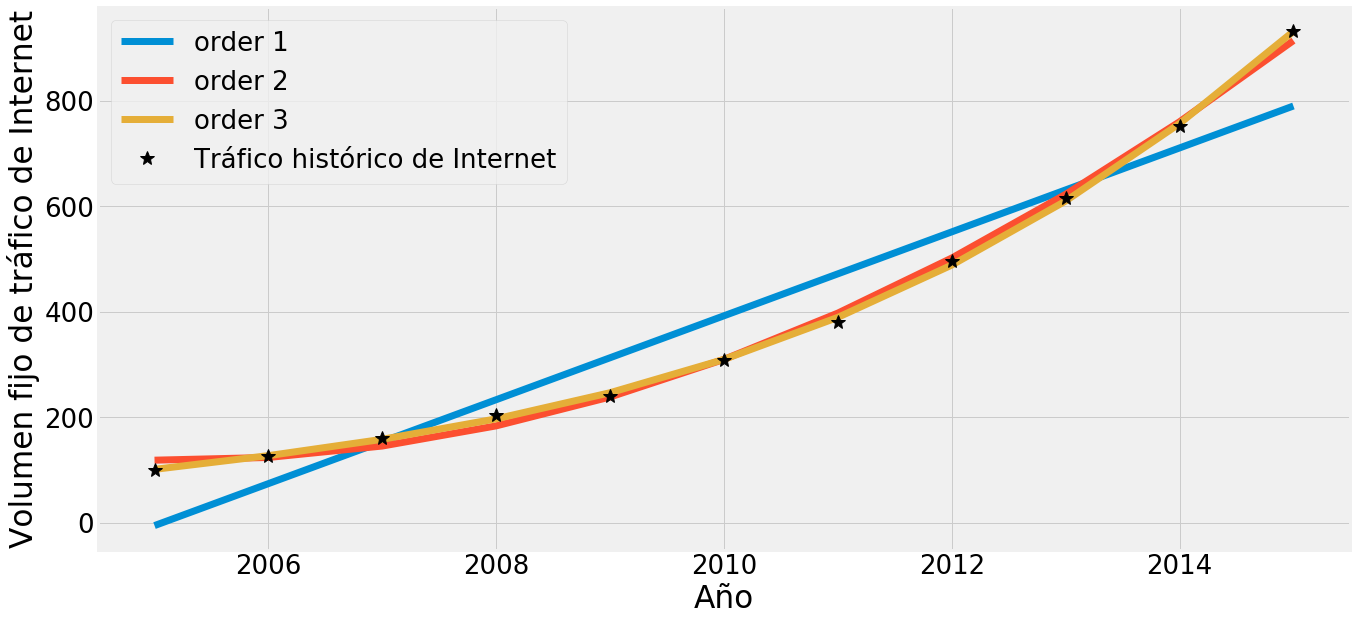

In [6]:
models = []       # para almacenar parámetros del modelo polinomial (lista de objetos poly1d)
errors_hist = []  # para almacenar los errores absolutos para cada punto (2005-2015) y para cada modelo (lista de matrices numpy)
mse_hist = []     # para almacenar el MSE para cada modelo (lista de flotadores numpy)
for order in range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualiza el modelo
for model in models[0:3]:
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Tráfico histórico de Internet', linewidth = 7)
plt.legend(loc = 'upper left')

# Añade las etiquetas
plt.xlabel('Año')
plt.ylabel('Volumen fijo de tráfico de Internet')

plt.show()

### Parte 5: Calcular los errores

Compare los errores y visualice la aptitud correspondiente a los diferentes modelos de regresión por errores.

Una vez dada la familia del modelo de regresión, el error cuadrático medio (o ECM) es una métrica de calidad de aptitud. La idea es que queremos que nuestra función polinómica se adapte a nuestros datos lo más posible.


In [7]:
# Calcular y almacenar los errores
models = []       # para almacenar parámetros del modelo polinomial (lista de objetos poly1d)
errors_hist = []  # para almacenar los errores absolutos para cada punto (2005-2015) y para cada modelo (lista de matrices numpy)
mse_hist = []     # para almacenar el MSE para cada modelo (lista de flotadores numpy)

for order in range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # Error absoluto
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   
    mse_hist.append(mse) 

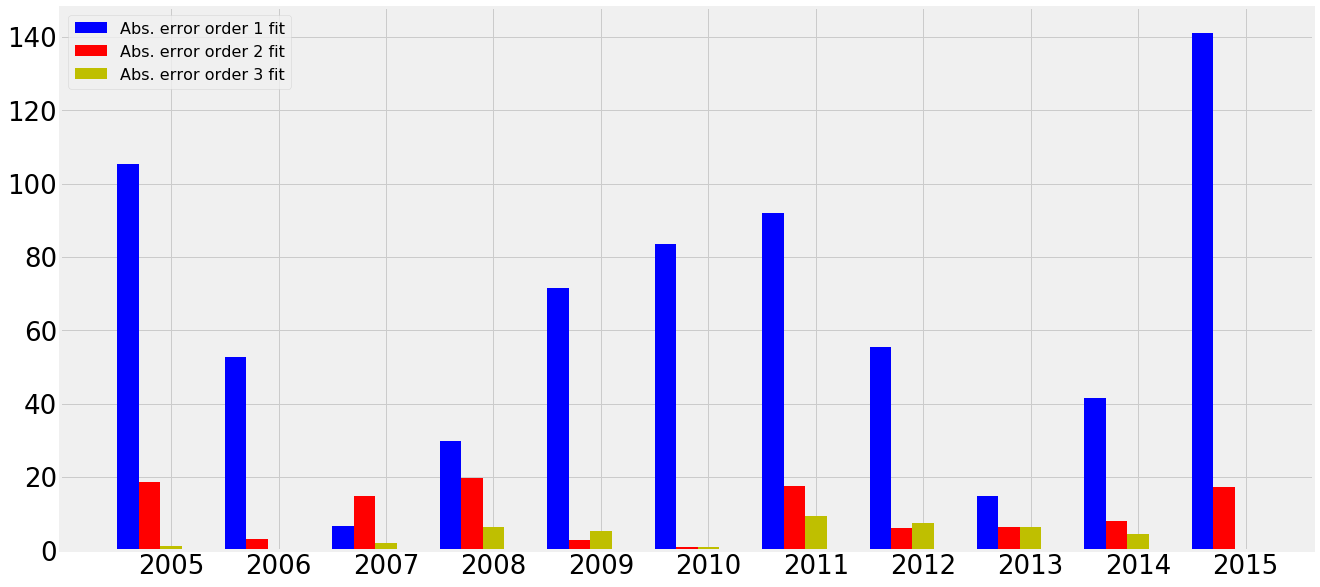

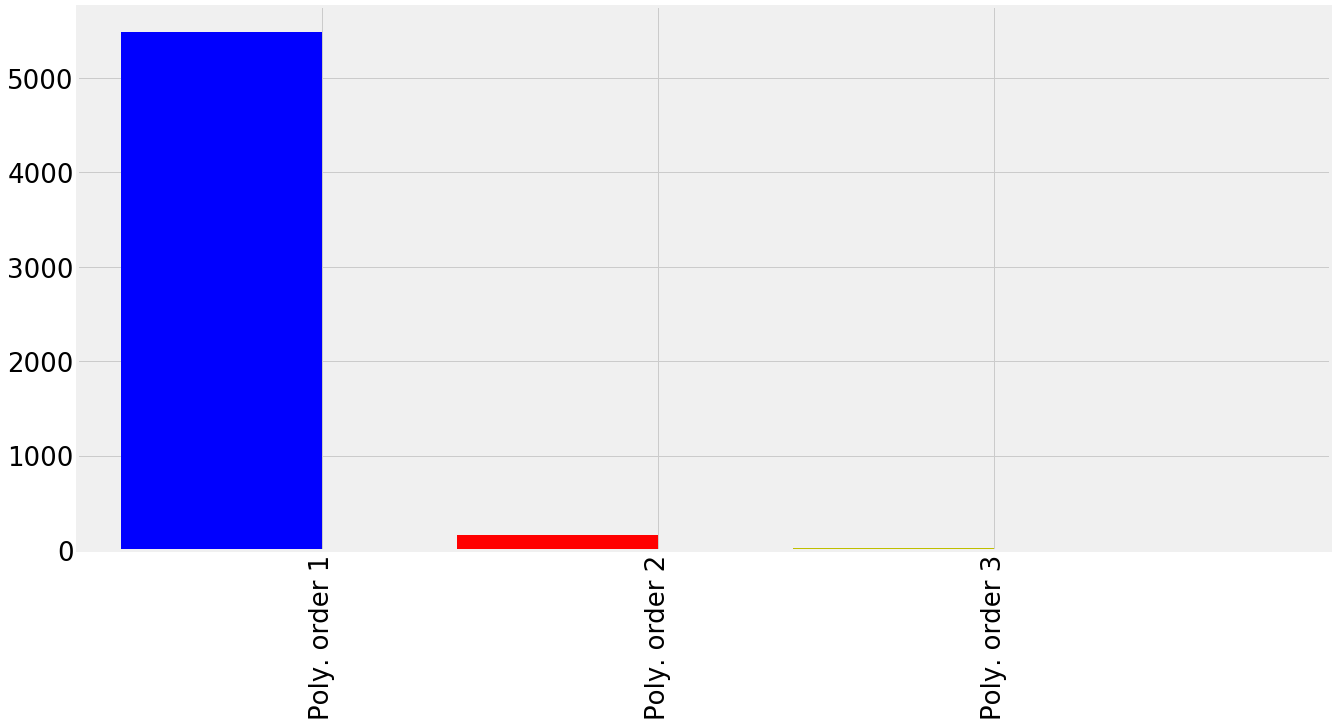

In [8]:

x = df_hist.year
width = 0.2   #Tamaño de la barra

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

In [9]:
# Función de orden polinomial
order = 3

x = df_hist.year.values      
y = df_hist.traffic.values  

# Ajustar el modelo, devolver los valores de los parámetros polinómicos en una matriz numpy tal que
# y = p [0] * x ** orden + p [1] * x * (orden-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d es una clase de conveniencia, utilizada para encapsular operaciones "naturales" en polinomios
# para que dichas operaciones puedan adoptar su forma habitual en código

# envolver el p_array en un objeto poly1
p = np.poly1d(p_array)

print(type(p), p)
# usa el objeto poly1d para evaluar el valor del polinomio en un punto específico
print('El valor del polinomio para x = 2020 es : {} '.format(p(2020)))
# calcular el error absoluto para cada valor de xy el error MSE para el modelo polinómico estimado
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('Los parámetros polinómicos estimados son: {}'.format(p))
print('Los errores para cada valor de x, dados los parámetros polinómicos estimados son: \n {}'.format(e))
print('El MSE es:{}'.format(mse))


<class 'numpy.ndarray'> [ 4.83129470e-01 -2.90500618e+03  5.82252165e+06 -3.89005440e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
El valor del polinomio para x = 2020 es : 2328.578483104706 
Los parámetros polinómicos estimados son:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
Los errores para cada valor de x, dados los parámetros polinómicos estimados son: 
 [1.30741405 0.39124263 2.02723313 6.32983589 5.28394069 0.93069372
 9.41691687 7.34010701 6.27730367 4.48133361 0.16290948]
El MSE es:25.172185914969578


### Parte 6: Modelo de regresión no lineal - Crecimiento exponencial

En el caso de los datos sobre el tráfico de Internet, sabemos que la verdadera relación matemática subyacente entre el tráfico y el año es una de crecimiento exponencial. Por lo tanto, podemos usar eso como modelo y estimar los parámetros a
 y r más aptos. Sin embargo, el crecimiento exponencial es una función no lineal. Esto convierte al cálculo de los parámetros óptimos en un problema mucho más complejo. No es posible minimizar el ECM con una simple fórmula cerrada; se necesita un algoritmo iterativo, que podría no ser capaz de converger hasta la solución óptima. La regresión no lineal es un tema por sí misma.

In [10]:
# Ajuste de modelo de regresión no lineal

# Primero, defina la función del modelo de regresión, en este caso, elegiremos una exponencial de la forma y = a * (b ^ (x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    
y = df_hist.traffic.values  

# use curve_fit para encontrar el vector de parámetros exponenciales p. cov expresa la confianza de la
# algoritmo en los parámetros estimados
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)
print('Los parámetros exponenciales estimados son: {}'.format(p))
print('Los errores para cada valor de x, dados los parámetros exponenciales estimados son: \n {}'.format(e))
print('El MSE es :{}'.format(mse))

models.append(p)

errors_hist.append(e) 
mse_hist.append(mse)

Los parámetros exponenciales estimados son: [103.37820148   1.24678465]
Los errores para cada valor de x, dados los parámetros exponenciales estimados son: 
 [ 3.37820148  1.95659906  0.39475809  3.03416216  8.50876833  2.65664482
  8.32850909 11.70265945 12.59154092  0.47531784  7.10276492]
El MSE es :47.23616366678741


### Parte 7: Comparar modelos


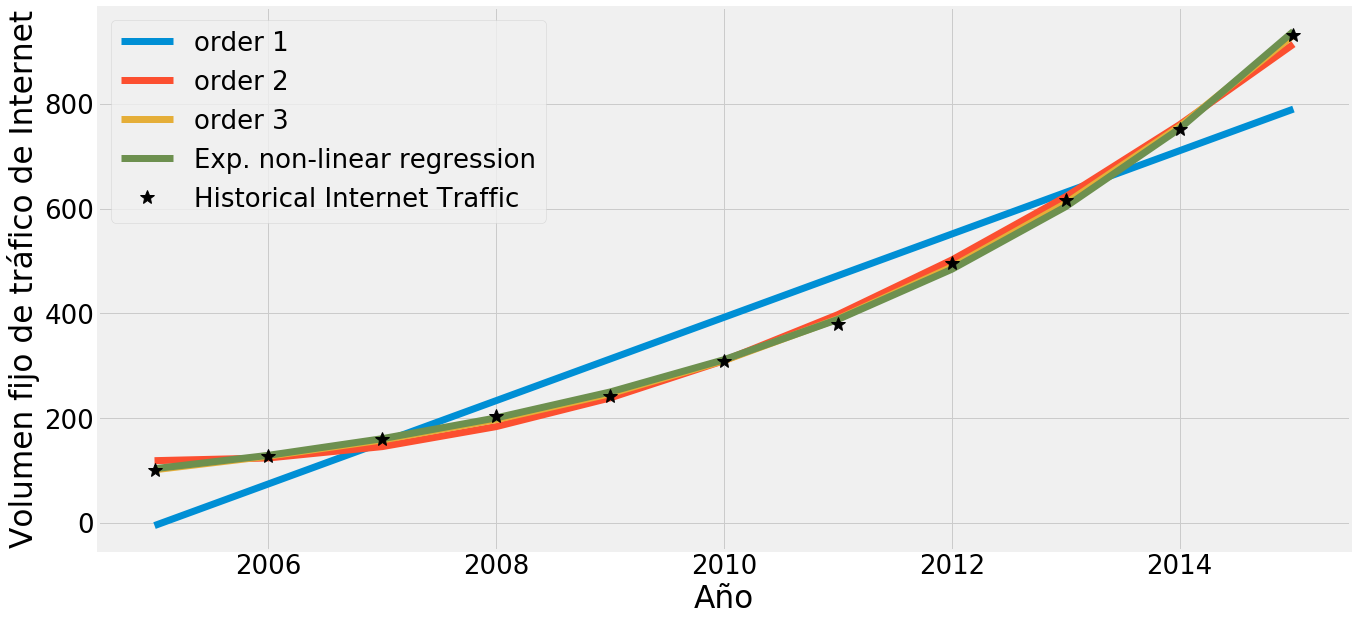

In [11]:
plt.figure(figsize = (20,10))

for model in models[0:-1]:
    
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

x = np.arange(2016-2005)    
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Año')
plt.ylabel('Volumen fijo de tráfico de Internet')
plt.show()

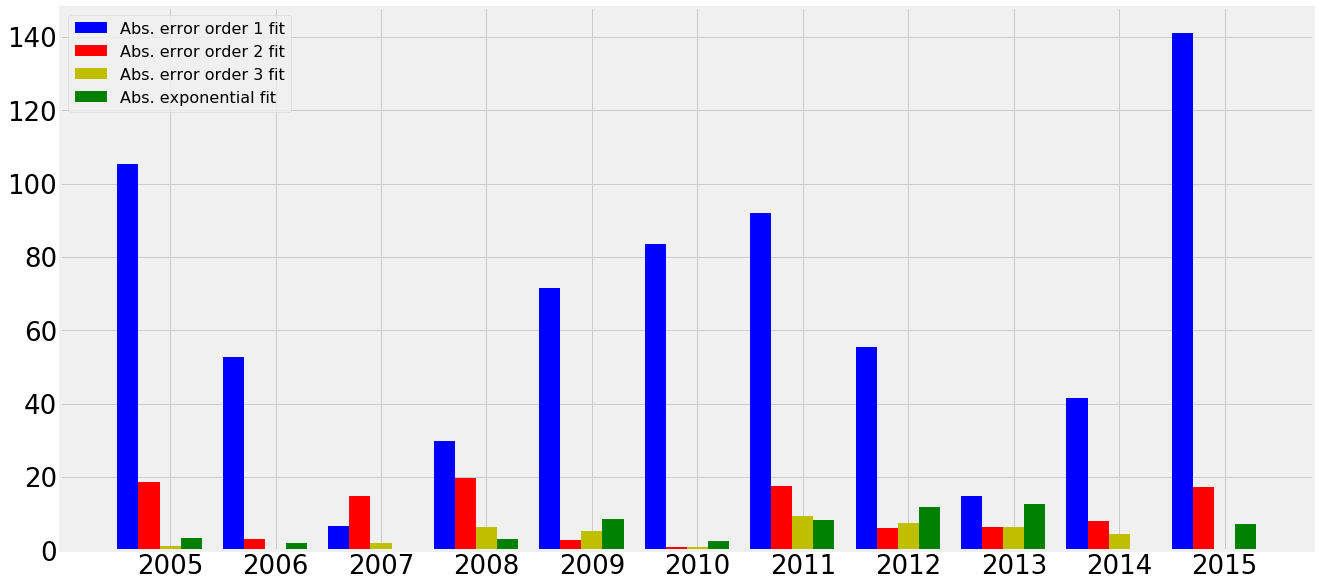

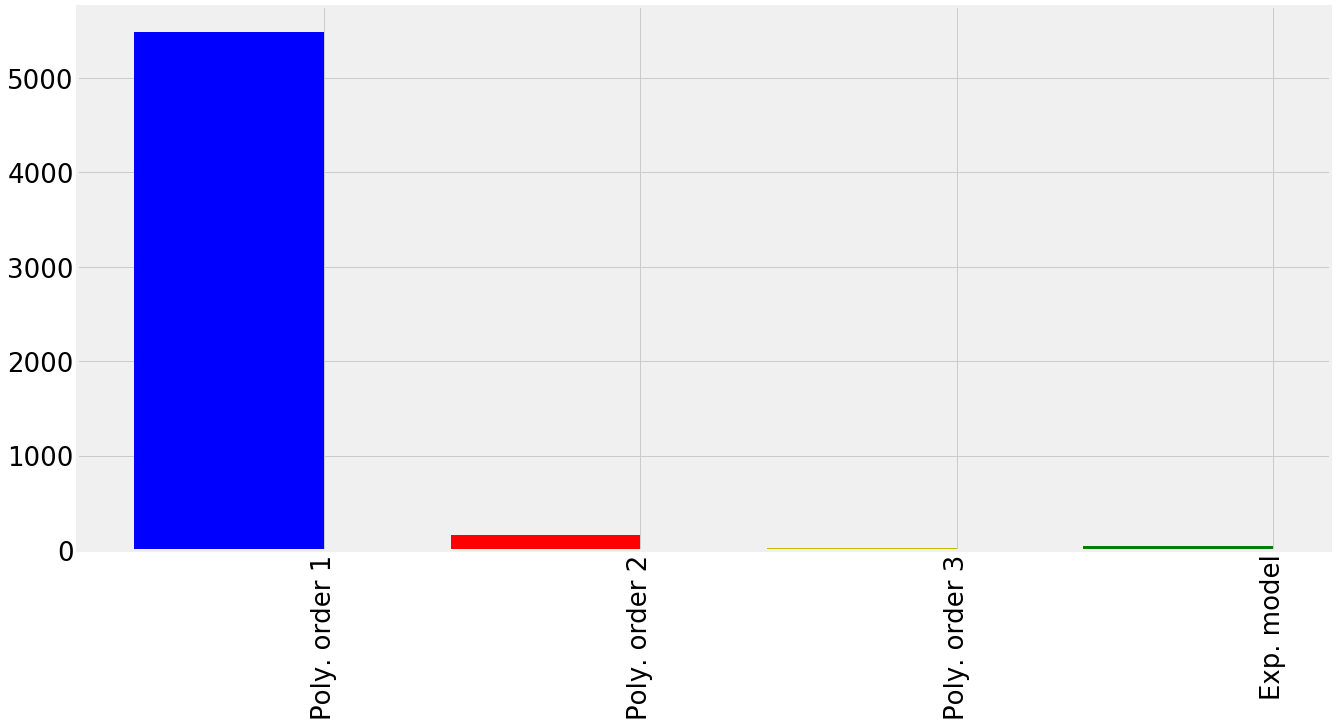

In [12]:

x = df_hist.year
width = 0.2   #Tamaño de la barra

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" la gráfica de barra
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualiza el MSE de cada modelo
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #Tamaño de la barra

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

### Parte 8: Utilizar un modelo de regresión para predecir valores futuros
#### Paso 1: Cargar y visualizar el volumen de tráfico de Internet proyectado.

In [13]:
filename = 'internet_traffic_proj.csv'
df_proj = pd.read_csv(filename)
df_proj.head()

,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019


#### Paso 2: Comparar errores de predicción en modelos lineales y no lineales.

Fusione los DataFrames df_proj y df_hist, y visualice cómo se comporta el modelo de regresión utilizado anteriormente al predecir valores futuros.


In [14]:
df = pd.concat([df_hist, df_proj]).reset_index()
df.drop('index', axis=1, inplace=True)
df = df.drop_duplicates() #Valor encontrado en 2015
df.head(20)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


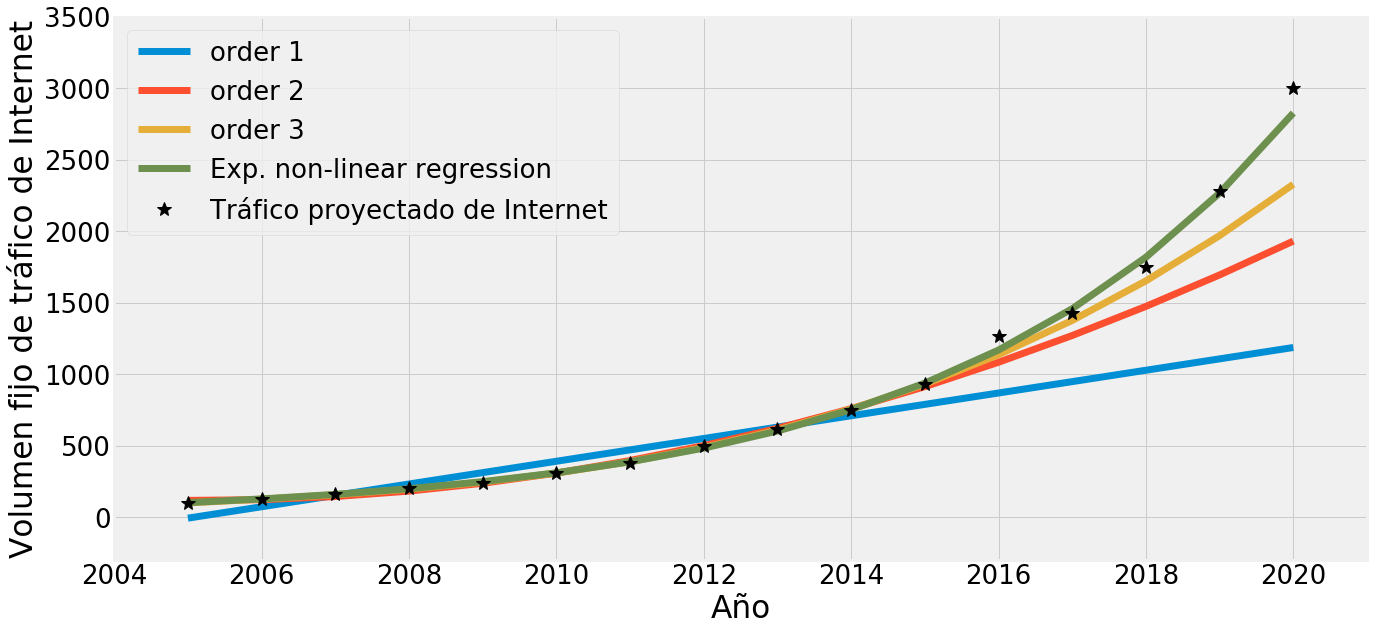

In [15]:
plt.figure(figsize = (20,10))

errors_all = []
mse_all = []

for model in models[0:-1]:
    
    x = df.year.values      
    y = df.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)
    
    pred_y = model(x)
    e = np.abs(y - pred_y)
    errors_all.append(e)   
    mse_all.append(np.sum(e**2)/len(df)) 
    
    
# Visualiza el modelo exponencial
x = np.arange(2021-2005)    #Toma en cuanta los datos del 2005
pred_y = my_exp_func(x, *models[-1])
plt.plot(df.year.values, pred_y, label = 'Exp. non-linear regression', linewidth = 7)

# errores y mse del modelo exponencial
e = np.abs(y - pred_y)
errors_all.append(e)   
mse_all.append(np.sum(e**2)/len(df))

plt.plot(df.year, df.traffic, '*k', markersize = 14, label='Tráfico proyectado de Internet')
plt.legend(loc = 'upper left')

# Añade las etiquetas
plt.xlabel('Año')
plt.ylabel('Volumen fijo de tráfico de Internet')
plt.axis([2004,2021, -300, 3500])
plt.show()

**Pregunta: ¿A qué conclusiones puede llegar con respecto al modelo polinómico de tercer orden y al modelo exponencial?**

**Respuesta**: Podemos usar cualquiera de los dos modelos para poder llegar a ciertos resultados en concreto, m'as sin embargo el modelo exponencial da resultados mas cercanos a la proyección de tráfico de internet, pero la manera de realizar sus cálculos son un poco más avanzados que el otro modelo.
